In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import numpy as np
import datetime as dt
import gsw

In [2]:
def day_of_year(dts): 
    if isinstance(dts,pd.Timestamp):
        return (dts-pd.Timestamp(dt.datetime(dts.year-1,12,31))).days
    elif hasattr(dts,'__len__') and not isinstance(dts,str): # assume array of datetimes
        return np.array([day_of_year(el) for el in dts])
    elif pd.isnull(dts):
        return np.nan
    else:
        raise TypeError('bad type: ', type(dts))

### reload

In [3]:
df_ctd=pd.read_csv('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/StatDownOc/data/modified/df_ctd.csv')

In [4]:
df_ctd

,Unnamed: 0,STATION_ID,TIME,LATITUDE,LONGITUDE,DEPTH,PRESSURE,PRESSURE_BIN_CNTR,TEMPERATURE,SALINITY,...,CruiseNo,CruiseNo_2,CruiseNo_3,CruiseNo_4,CruiseNo_5,CruiseNo_6,CruiseNo_7,CruiseNo_8,CruiseNo_9,tpd_cruise
0,1189,P18,1969-02-23 19:54:00,49.433334,-136.666672,949.999993,960.381400,960.5,3.0400,34.3600,...,1.0,1,1,1,1,1,1,1,1,1969-03-05 10:51:52.440944880
1,1190,P18,1969-02-23 19:54:00,49.433334,-136.666672,1200.000056,1213.845700,1213.5,2.6800,34.4400,...,1.0,1,1,1,1,1,1,1,1,1969-03-05 10:51:52.440944880
2,1188,P18,1969-02-23 19:54:00,49.433334,-136.666672,170.000010,171.532200,171.5,4.6700,33.6100,...,1.0,1,1,1,1,1,1,1,1,1969-03-05 10:51:52.440944880
3,1187,P18,1969-02-23 19:54:00,49.433334,-136.666672,30.000000,30.260023,30.5,5.2800,32.5300,...,1.0,1,1,1,1,1,1,1,1,1969-03-05 10:51:52.440944880
4,2024,P22,1969-02-24 09:42:00,49.700001,-140.666672,139.999999,141.254880,141.5,4.5400,33.3200,...,1.0,1,1,1,1,1,1,1,1,1969-03-05 10:51:52.440944880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233798,5229341,P4,2020-08-24 05:15:48,48.649502,-126.664169,1129.247563,1142.000000,1142.5,3.2782,34.4227,...,244.0,599,407,326,266,244,223,203,199,2020-08-17 17:18:31.654615296
5233799,5229342,P4,2020-08-24 05:15:48,48.649502,-126.664169,1130.233708,1143.000000,1143.5,3.2736,34.4228,...,244.0,599,407,326,266,244,223,203,199,2020-08-17 17:18:31.654615296
5233800,5229343,P4,2020-08-24 05:15:48,48.649502,-126.664169,1131.318462,1144.100000,1144.5,3.2684,34.4230,...,244.0,599,407,326,266,244,223,203,199,2020-08-17 17:18:31.654615296
5233801,5229336,P4,2020-08-24 05:15:48,48.649502,-126.664169,1124.316768,1137.000000,1137.5,3.2863,34.4217,...,244.0,599,407,326,266,244,223,203,199,2020-08-17 17:18:31.654615296


In [5]:
df_ctd['tpd_cruise']=[pd.Timestamp(el) for el in df_ctd['tpd_cruise']]

In [6]:
np.max(df_ctd.PRESSURE),np.min(df_ctd.PRESSURE)

(4325.6, 0.0)

(4200.0, 4300.0)

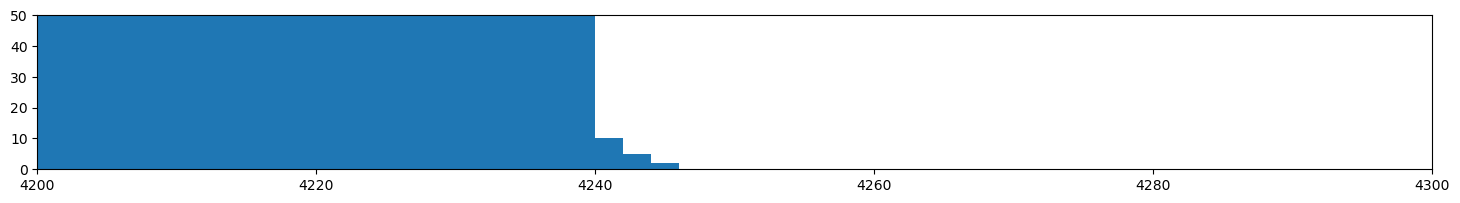

In [7]:
fig,ax=plt.subplots(1,1,figsize=(18,2))
ax.hist(df_ctd.DEPTH,np.arange(0,4255,2))
ax.set_ylim(0,50)
ax.set_xlim(4200,4300)

In [8]:
z_edges=np.arange(0,4001,5) # 0 to 4000 inclusive

In [9]:
z_noms=(z_edges[:-1]+z_edges[1:])/2

In [10]:
z_inds=np.digitize(df_ctd.DEPTH.values,z_edges)

In [11]:
np.unique(z_inds)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
z_noms=np.append(z_noms,[None,],axis=0)
z_noms

array([2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5,
       57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5, 102.5, 107.5,
       112.5, 117.5, 122.5, 127.5, 132.5, 137.5, 142.5, 147.5, 152.5,
       157.5, 162.5, 167.5, 172.5, 177.5, 182.5, 187.5, 192.5, 197.5,
       202.5, 207.5, 212.5, 217.5, 222.5, 227.5, 232.5, 237.5, 242.5,
       247.5, 252.5, 257.5, 262.5, 267.5, 272.5, 277.5, 282.5, 287.5,
       292.5, 297.5, 302.5, 307.5, 312.5, 317.5, 322.5, 327.5, 332.5,
       337.5, 342.5, 347.5, 352.5, 357.5, 362.5, 367.5, 372.5, 377.5,
       382.5, 387.5, 392.5, 397.5, 402.5, 407.5, 412.5, 417.5, 422.5,
       427.5, 432.5, 437.5, 442.5, 447.5, 452.5, 457.5, 462.5, 467.5,
       472.5, 477.5, 482.5, 487.5, 492.5, 497.5, 502.5, 507.5, 512.5,
       517.5, 522.5, 527.5, 532.5, 537.5, 542.5, 547.5, 552.5, 557.5,
       562.5, 567.5, 572.5, 577.5, 582.5, 587.5, 592.5, 597.5, 602.5,
       607.5, 612.5, 617.5, 622.5, 627.5, 632.5, 637.5, 642.5, 647.5,
       652.5, 

In [13]:
df_ctd['z_nom']=[z_noms[el-1] for el in z_inds] # np.digitize indexes starting at 1 instead of zero

In [14]:
df_ctd.columns

Index(['Unnamed: 0', 'STATION_ID', 'TIME', 'LATITUDE', 'LONGITUDE', 'DEPTH',
       'PRESSURE', 'PRESSURE_BIN_CNTR', 'TEMPERATURE', 'SALINITY',
       'OXYGEN_MMOL_M3', 'OXYGEN_UMOL_KG', 'Sta', 'tpd', 'YM', 'yearday',
       'sin_yearday', 'cos_yearday', 'CruiseNo', 'CruiseNo_2', 'CruiseNo_3',
       'CruiseNo_4', 'CruiseNo_5', 'CruiseNo_6', 'CruiseNo_7', 'CruiseNo_8',
       'CruiseNo_9', 'tpd_cruise', 'z_nom'],
      dtype='object')

In [15]:
df_ctd_out=df_ctd.loc[df_ctd.z_nom>0,['CruiseNo','Sta','tpd_cruise','z_nom','TEMPERATURE','SALINITY','OXYGEN_MMOL_M3','OXYGEN_UMOL_KG']].groupby(['CruiseNo','Sta','tpd_cruise','z_nom',]).mean().reset_index()

In [16]:
df_ctd_out

,CruiseNo,Sta,tpd_cruise,z_nom,TEMPERATURE,SALINITY,OXYGEN_MMOL_M3,OXYGEN_UMOL_KG
0,1.0,18,1969-03-05 10:51:52.440944880,32.5,5.280000,32.53000,NaN,NaN
1,1.0,18,1969-03-05 10:51:52.440944880,172.5,4.670000,33.61000,NaN,NaN
2,1.0,18,1969-03-05 10:51:52.440944880,947.5,3.040000,34.36000,NaN,NaN
3,1.0,18,1969-03-05 10:51:52.440944880,1202.5,2.680000,34.44000,NaN,NaN
4,1.0,22,1969-03-05 10:51:52.440944880,137.5,4.540000,33.32000,NaN,NaN
...,...,...,...,...,...,...,...,...
971271,244.0,35,2020-08-17 17:18:31.654615296,1962.5,1.990920,34.57418,49.9520,48.720
971272,244.0,35,2020-08-17 17:18:31.654615296,1967.5,1.988375,34.57470,50.3980,49.075
971273,244.0,35,2020-08-17 17:18:31.654615296,1972.5,1.984340,34.57550,50.3980,49.020
971274,244.0,35,2020-08-17 17:18:31.654615296,1977.5,1.980720,34.57620,51.0224,49.700


In [17]:
len(df_ctd_out.tpd_cruise.unique()),len(df_ctd.CruiseNo.unique()),len(df_ctd.tpd_cruise.unique()),len(df_ctd_out.tpd_cruise.unique())

(299, 299, 299, 299)

In [18]:
gridSpecs=pd.read_csv('gridspecs.csv')
gridSpecs.columns

Index(['Unnamed: 0', 'nom_lon', 'nom_lat', 'lonedges_lo', 'lonedges_hi',
       'latedges_lo', 'latedges_hi', 'Sta', 'StaLon', 'StaLat', 'Index'],
      dtype='object')

In [19]:
x=gridSpecs.Index
len(x)

38

In [20]:
stas=df_ctd_out.Sta.unique()

In [21]:
z=z_noms[:-1]
len(z)

800

In [22]:
times=df_ctd_out.tpd_cruise.unique()
#cruises=df_all.CruiseNo.unique()

In [23]:
df_ctd_out=df_ctd_out.rename(columns={
            "TEMPERATURE": "Temperature",
            "SALINITY": "Salinity",
            "OXYGEN_UMOL_KG": "Oxygen_umolkg",
            "OXYGEN_MMOL_M3": "Oxygen_mmol_m3",
        })

In [24]:
variables = ["Temperature", "Salinity", "Oxygen_umolkg", "Oxygen_mmol_m3"]
data_dict = {var: np.full((len(times), len(x), len(z)), np.nan) for var in variables}

In [25]:
for t_idx, t in enumerate(times):
    df_t = df_ctd_out.loc[df_ctd_out["tpd_cruise"] == t]
    for s_idx, s in enumerate(stas):
        df_s = df_t.loc[df_t["Sta"] == s]
        if df_s.empty:
            continue
        depth_idx = np.searchsorted(z_noms, df_s["z_nom"])
        for var in variables:
            valid = (depth_idx >= 0) & (depth_idx < len(z_noms))
            data_dict[var][t_idx, s_idx, depth_idx[valid]] = df_s[var].values[valid]

In [26]:
data_dict['Temperature']

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 4.29      ,         nan,  4.22333333, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 4.5       ,  4.5       ,  4.36      , ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  

In [27]:
zfull=z_noms[:-1]*np.ones_like(data_dict['Temperature'])

In [28]:
zfull.shape, np.unique(zfull[:,:,5])

((299, 38, 800), array([27.5], dtype=object))

In [29]:
pt=gsw.pt0_from_t(35.16504/35*data_dict['Salinity'],data_dict['Temperature'],gsw.p_from_z(zfull,49))


In [30]:
yd=day_of_year(times)
sin_yd=np.sin(yd/365.25*np.pi/180)
cos_yd=np.cos(yd/365.25*np.pi/180)

In [31]:
# Return as xarray dataset
ds = xr.Dataset({
    **{var: (("t_ind", "x", "z"), data_dict[var]) for var in variables},
    't_pot': (("t_ind", "x", "z"), pt),
        'station':(("x",), gridSpecs.Sta.values),
    },
    coords={
        "t_ind": np.arange(0,len(times)),
        "time": ("t_ind",times),
        "x":x,
        "lat" : ('x', gridSpecs.nom_lat.values),
        "lon" : ('x',gridSpecs.nom_lon.values),
        "z": z_noms[:-1],
        "yearday": ("t_ind",day_of_year(times)),
        "sin_yearday": ("t_ind",sin_yd),
        "cos_yearday": ("t_ind",cos_yd),
    },
)

ds["z"].attrs["units"] = "m"
ds["Temperature"].attrs["units"] = "deg C"
ds["t_pot"].attrs["units"] = "deg C"
ds["Salinity"].attrs["units"] = "PSU"
ds["Oxygen_umolkg"].attrs["units"] = "umol/kg"
ds["Oxygen_mmol_m3"].attrs["units"] = "mmol/m3"
ds["lat"].attrs["units"] = "deg"
ds["lon"].attrs["units"] = "deg"


In [32]:
ds

<xarray.Dataset> Size: 364MB
Dimensions:         (t_ind: 299, x: 38, z: 800)
Coordinates:
  * t_ind           (t_ind) int64 2kB 0 1 2 3 4 5 6 ... 293 294 295 296 297 298
    time            (t_ind) datetime64[ns] 2kB <class 'xarray.core.extension_...
  * x               (x) int64 304B 0 1 2 3 4 5 6 7 8 ... 30 31 32 33 34 35 36 37
    lat             (x) float64 304B 50.0 49.96 49.93 ... 48.72 48.69 48.65
    lon             (x) float64 304B -145.0 -144.5 -144.0 ... -127.2 -126.7
  * z               (z) object 6kB 2.5 7.5 12.5 17.5 ... 3987.5 3992.5 3997.5
    yearday         (t_ind) int64 2kB 64 82 95 142 158 ... 158 231 44 179 230
    sin_yearday     (t_ind) float64 2kB 0.003058 0.003918 ... 0.008553 0.01099
    cos_yearday     (t_ind) float64 2kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 0.9999
Data variables:
    Temperature     (t_ind, x, z) float64 73MB nan nan nan nan ... nan nan nan
    Salinity        (t_ind, x, z) float64 73MB nan nan nan nan ... nan nan nan
    Oxygen_umolkg   (t_ind, x, z) float64 73MB nan nan nan nan ... nan nan nan
    Oxygen_mmol_m3  (t_ind, x, z) float64 73MB nan nan nan nan ... nan nan nan
    t_pot           (t_ind, x, z) float64 73MB nan nan nan nan ... nan nan nan
    station         (x) float64 304B 26.0 35.0 nan 25.0 nan ... 7.0 6.0 5.0 4.0

In [33]:
ds.Temperature

<xarray.DataArray 'Temperature' (t_ind: 299, x: 38, z: 800)> Size: 73MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 4.29      ,         nan,  4.22333333, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 4.5       ,  4.5       ,  4.36      , ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[15.7643    , 15.74334   , 15.65752   , ...,         nan,
                 nan,         nan],
        [14.32335   , 14.33102   , 14.2704    , ...,         nan,
                 nan,         nan],
        [13.7904125 , 13.78147   , 13.72423   , ...,  1.50638   ,
          1.50651667,  1.50698   ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], shape=(299, 38, 800))
Coordinates:
  * t_ind        (t_ind) int64 2kB 0 1 2 3 4 5 6 ... 292 293 294 295 296 297 298
    time         (t_ind) datetime64[ns] 2kB <class 'xarray.core.extension_arr...
  * x            (x) int64 304B 0 1 2 3 4 5 6 7 8 ... 29 30 31 32 33 34 35 36 37
    lat          (x) float64 304B 50.0 49.96 49.93 49.89 ... 48.72 48.69 48.65
    lon          (x) float64 304B -145.0 -144.5 -144.0 ... -127.7 -127.2 -126.7
  * z            (z) object 6kB 2.5 7.5 12.5 17.5 ... 3987.5 3992.5 3997.5
    yearday      (t_ind) int64 2kB 64 82 95 142 158 191 ... 158 231 44 179 230
    sin_yearday  (t_ind) float64 2kB 0.003058 0.003918 ... 0.008553 0.01099
    cos_yearday  (t_ind) float64 2kB 1.0 1.0 1.0 1.0 ... 0.9999 1.0 1.0 0.9999
Attributes:
    units:    deg C

In [34]:
ds=ds.transpose('t_ind','z','x')

In [35]:
ds.to_netcdf('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/StatDownOc/output/ctdObs/ctd_obs_ds.nc')

In [36]:
ds

<xarray.Dataset> Size: 364MB
Dimensions:         (t_ind: 299, x: 38, z: 800)
Coordinates:
  * t_ind           (t_ind) int64 2kB 0 1 2 3 4 5 6 ... 293 294 295 296 297 298
    time            (t_ind) datetime64[ns] 2kB <class 'xarray.core.extension_...
  * x               (x) int64 304B 0 1 2 3 4 5 6 7 8 ... 30 31 32 33 34 35 36 37
    lat             (x) float64 304B 50.0 49.96 49.93 ... 48.72 48.69 48.65
    lon             (x) float64 304B -145.0 -144.5 -144.0 ... -127.2 -126.7
  * z               (z) object 6kB 2.5 7.5 12.5 17.5 ... 3987.5 3992.5 3997.5
    yearday         (t_ind) int64 2kB 64 82 95 142 158 ... 158 231 44 179 230
    sin_yearday     (t_ind) float64 2kB 0.003058 0.003918 ... 0.008553 0.01099
    cos_yearday     (t_ind) float64 2kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 0.9999
Data variables:
    Temperature     (t_ind, z, x) float64 73MB nan nan 4.29 nan ... nan nan nan
    Salinity        (t_ind, z, x) float64 73MB nan nan 32.6 nan ... nan nan nan
    Oxygen_umolkg   (t_ind, z, x) float64 73MB nan nan nan nan ... nan nan nan
    Oxygen_mmol_m3  (t_ind, z, x) float64 73MB nan nan nan nan ... nan nan nan
    t_pot           (t_ind, z, x) float64 73MB nan nan 4.29 nan ... nan nan nan
    station         (x) float64 304B 26.0 35.0 nan 25.0 nan ... 7.0 6.0 5.0 4.0